In [17]:
#pip install sodapy
%matplotlib inline

# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata

In [18]:
client = Socrata("data.cityofchicago.org", None)
results = client.get("naz8-j4nc", limit=2000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,lab_report_date,cases_total,deaths_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,...,deaths_unknown_age,deaths_female,deaths_male,deaths_unknown_gender,deaths_latinx,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth
0,2020-07-21T00:00:00.000,6,0,1,0,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2020-07-20T00:00:00.000,36,0,2,8,7,9,3,4,3,...,0,0,0,0,0,0,0,0,0,0
2,2020-07-19T00:00:00.000,46,0,8,8,10,7,5,3,3,...,0,0,0,0,0,0,0,0,0,0
3,2020-07-18T00:00:00.000,64,2,9,17,12,8,10,4,3,...,0,0,2,0,1,0,0,1,0,0
4,2020-07-17T00:00:00.000,147,1,13,44,29,28,10,12,7,...,0,0,1,0,1,0,0,0,0,0


In [19]:
results_df.to_csv("covid_chicago.csv")

In [20]:
# Case by race dataframe
case_by_race_df = results_df[["lab_report_date",
                      "cases_total",
                      "cases_latinx",
                      "cases_asian_non_latinx",
                      "cases_black_non_latinx",
                      "cases_white_non_latinx",
                      "cases_other_non_latinx",
                     "cases_unknown_race_eth"]]

# Clean the data by dropping empty row
case_by_race_df = case_by_race_df.dropna(how = "any")

# Change data type from str to int
cols = case_by_race_df.columns.drop("lab_report_date")
case_by_race_df[cols] = case_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

# Remove time from date&time variable
case_by_race_df["lab_report_date"] = pd.to_datetime(case_by_race_df["lab_report_date"]).dt.date

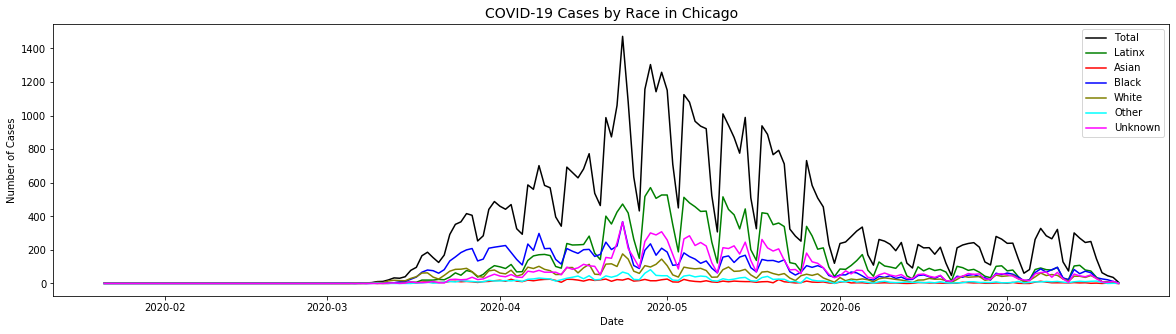

In [21]:
# Generate line graph of cases of different races over time
plt.figure(figsize=(20,5))
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_total"], color="black", label = "Total")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_latinx"], color="green", label = "Latinx")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_asian_non_latinx"], color="red", label = "Asian")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_black_non_latinx"], color="blue", label = "Black")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_white_non_latinx"], color="olive", label = "White")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_other_non_latinx"], color="cyan", label = "Other")
plt.plot(case_by_race_df["lab_report_date"], case_by_race_df["cases_unknown_race_eth"], color="magenta", label = "Unknown")
plt.title("COVID-19 Cases by Race in Chicago", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(loc="upper right")
plt.savefig("Images/cases_by_race_Chicago.png")
plt.show()

In [22]:
# Calculate the cumulative cases of each race
cul_latinx = case_by_race_df["cases_latinx"].sum()
cul_asian = case_by_race_df["cases_asian_non_latinx"].sum()
cul_black = case_by_race_df["cases_black_non_latinx"].sum()
cul_white = case_by_race_df["cases_white_non_latinx"].sum()
cul_other = case_by_race_df["cases_other_non_latinx"].sum()
cul_unknown = case_by_race_df["cases_unknown_race_eth"].sum()

In [23]:
# Death by race dataframe
death_by_race_df = results_df[["lab_report_date",
                      "deaths_total",
                      "deaths_latinx",
                      "deaths_asian_non_latinx",
                      "deaths_black_non_latinx",
                      "deaths_white_non_latinx",
                      "deaths_other_non_latinx",
                     "deaths_unknown_race_eth"]]

In [26]:
# Clean the data by dropping empty row
death_by_race_df = death_by_race_df.dropna(how = "any")

In [27]:
# Change data type from str to int
cols = death_by_race_df.columns.drop("lab_report_date")
death_by_race_df[cols] = death_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

In [28]:
# Remove time from date&time variable
death_by_race_df["lab_report_date"] = pd.to_datetime(death_by_race_df["lab_report_date"]).dt.date

In [29]:
# Calculate the cumulative deaths of each race
cul_latinx = death_by_race_df["deaths_latinx"].sum()
cul_asian = death_by_race_df["deaths_asian_non_latinx"].sum()
cul_black = death_by_race_df["deaths_black_non_latinx"].sum()
cul_white = death_by_race_df["deaths_white_non_latinx"].sum()
cul_other = death_by_race_df["deaths_other_non_latinx"].sum()
cul_unknown = death_by_race_df["deaths_unknown_race_eth"].sum()

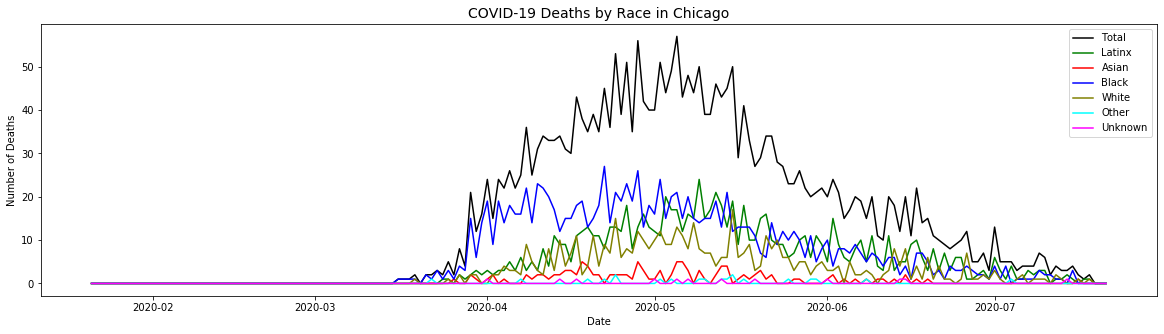

In [30]:
# Generate line graph of deaths of different races over time
plt.figure(figsize=(20,5))
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_total"], color="black", label = "Total")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_latinx"], color="green", label = "Latinx")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_asian_non_latinx"], color="red", label = "Asian")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_black_non_latinx"], color="blue", label = "Black")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_white_non_latinx"], color="olive", label = "White")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_other_non_latinx"], color="cyan", label = "Other")
plt.plot(death_by_race_df["lab_report_date"], death_by_race_df["deaths_unknown_race_eth"], color="magenta", label = "Unknown")
plt.title("COVID-19 Deaths by Race in Chicago", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.legend(loc="upper right")
plt.savefig("Images/deaths_by_race_Chicago.png")
plt.show()

(-1.1162622092175765,
 1.1261284931090065,
 -1.1021085688478234,
 1.1210222267859526)

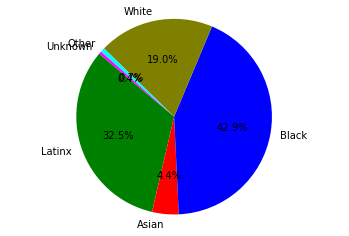

In [31]:
# Labels for the sections of our pie chart
labels = ["Latinx", "Asian", "Black", "White", "Other", "Unknown"]

# The values of each section of the pie chart
sizes = [cul_latinx, cul_asian, cul_black, cul_white, cul_other, cul_unknown]

# The colors of each section of the pie chart
colors = ["green", "red", "blue", "olive", "cyan", "magenta"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")